In [41]:
import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from torchvision import datasets as dsets 
from torchvision import transforms

import numpy as np
import matplotlib.pyplot as plt
from statistics import mean

In [42]:
train = dsets.MNIST(root = './data', train = True, download = True, transform = transforms.ToTensor())
val = dsets.MNIST(root = './data', train = False, download = True, transform = transforms.ToTensor())

train_loader = DataLoader(dataset=train, batch_size=100, shuffle=True)
val_loader = DataLoader(dataset=val, batch_size=10000, shuffle=True)

In [43]:
input_size = 28 * 28
output_size = 10

In [44]:
class dropout_model(nn.Module):

    def __init__(self, insize, outsize, neurons, p):
        super(dropout_model, self).__init__()
        self.dropout = nn.Dropout(p = p)
        self.linear1 = nn.Linear(insize, neurons)
        self.linear2 = nn.Linear(neurons, neurons)
        self.linear3 = nn.Linear(neurons, neurons)
        self.linear4 = nn.Linear(neurons, outsize)

    def forward(self, x):
        out = torch.relu(self.linear1(x))
        out = torch.relu(self.dropout(self.linear2(out)))
        out = torch.relu(self.dropout(self.linear3(out)))
        out = self.linear4(out)
        return out

In [45]:
def train_model(model, epochs, learning_rate, final_lr):

    to_plot = []
    accuracy = []
    criterion = nn.CrossEntropyLoss()

    lr_decay = (final_lr - learning_rate) / int((3/4) * epochs)

    for epoch in range(epochs):
        opt = optim.SGD(model.parameters(), lr=learning_rate)

        print('EPOCH : ', epoch + 1)
        print('Batch : ', end = '')
        counter = 0
        mean_loss_list = []
        for x,y in train_loader :

            opt.zero_grad()
            x = x.view(x.shape[0], x.shape[2] * x.shape[3])
            yhat = model.forward(x)

            loss = criterion(yhat,y)
            mean_loss_list.append(loss.item())

            loss.backward()
            opt.step()

            if counter % 100 == 0 : 
                print(str(counter) + ' --> ', end = '', flush = True)
            counter += 1

        mean_loss = mean(mean_loss_list)
        to_plot.append(mean_loss)

        correct = 0
        incorrect = 0

        for x,y in val_loader :

            x = x.view(x.shape[0], x.shape[2] * x.shape[3])
            yhat = model.forward(x)

            for i in range(yhat.shape[0]):
                pred = yhat[i].argmax().item()
                actual = y[i].item()

                if pred == actual :
                    correct += 1
                else :
                    incorrect += 1
        
        acc = (correct / (correct + incorrect)) * 100
        accuracy.append(acc)

        print()
        print('Mean loss : ', mean_loss)
        print(f'Accuracy on test set : {acc} %')
        print('-' * 50)

        learning_rate = learning_rate - lr_decay

    return to_plot, accuracy

In [46]:
start_lr = 0.05
final_lr = 0.0001
epochs = 20

In [47]:
drop05 = dropout_model(input_size, output_size, 100, 0.5)
drop075 = dropout_model(input_size, output_size, 100, 0.75)
model_without_dropout = dropout_model(input_size, output_size, 100, 0)

print(model_without_dropout.parameters)

<bound method Module.parameters of dropout_model(
  (dropout): Dropout(p=0, inplace=False)
  (linear1): Linear(in_features=784, out_features=100, bias=True)
  (linear2): Linear(in_features=100, out_features=100, bias=True)
  (linear3): Linear(in_features=100, out_features=100, bias=True)
  (linear4): Linear(in_features=100, out_features=10, bias=True)
)>


In [48]:
drop05loss, drop05acc = train_model(drop05, epochs, start_lr, final_lr)

EPOCH :  1
Batch : 0 --> 100 --> 200 --> 300 --> 400 --> 500 --> 
Mean loss :  1.5900263005495072
Accuracy on test set : 75.41 %
--------------------------------------------------
EPOCH :  2
Batch : 0 --> 100 --> 200 --> 300 --> 400 --> 500 --> 
Mean loss :  0.5941792196035385
Accuracy on test set : 86.82 %
--------------------------------------------------
EPOCH :  3
Batch : 0 --> 100 --> 200 --> 300 --> 400 --> 500 --> 
Mean loss :  0.4072973203162352
Accuracy on test set : 90.66 %
--------------------------------------------------
EPOCH :  4
Batch : 0 --> 100 --> 200 --> 300 --> 400 --> 500 --> 
Mean loss :  0.3088002579907576
Accuracy on test set : 92.41 %
--------------------------------------------------
EPOCH :  5
Batch : 0 --> 100 --> 200 --> 300 --> 400 --> 500 --> 
Mean loss :  0.24795122793565194
Accuracy on test set : 93.73 %
--------------------------------------------------
EPOCH :  6
Batch : 0 --> 100 --> 200 --> 300 --> 400 --> 500 --> 
Mean loss :  0.21127195262039702


In [51]:
drop075loss, drop075acc = train_model(drop075, epochs, start_lr, final_lr)

EPOCH :  1
Batch : 0 --> 100 --> 200 --> 300 --> 400 --> 500 --> 
Mean loss :  0.39754797858496504
Accuracy on test set : 89.21 %
--------------------------------------------------
EPOCH :  2
Batch : 0 --> 100 --> 200 --> 300 --> 400 --> 500 --> 
Mean loss :  0.35832111510137715
Accuracy on test set : 90.09 %
--------------------------------------------------
EPOCH :  3
Batch : 0 --> 100 --> 200 --> 300 --> 400 --> 500 --> 
Mean loss :  0.3387530076007048
Accuracy on test set : 90.69 %
--------------------------------------------------
EPOCH :  4
Batch : 0 --> 100 --> 200 --> 300 --> 400 --> 500 --> 
Mean loss :  0.3143641852711638
Accuracy on test set : 91.28 %
--------------------------------------------------
EPOCH :  5
Batch : 0 --> 100 --> 200 --> 300 --> 400 --> 500 --> 
Mean loss :  0.2932556371266643
Accuracy on test set : 91.2 %
--------------------------------------------------
EPOCH :  6
Batch : 0 --> 100 --> 200 --> 300 --> 400 --> 500 --> 
Mean loss :  0.28242565707614026


In [39]:
nodroploss, nodropacc = train_model(model_without_dropout, epochs, start_lr, final_lr)

EPOCH :  1
Batch : 0 --> 100 --> 200 --> 300 --> 400 --> 500 --> 
Mean loss :  1.232796605328719
Accuracy on test set : 85.42 %
--------------------------------------------------
EPOCH :  2
Batch : 0 --> 100 --> 200 --> 300 --> 400 --> 500 --> 
Mean loss :  0.34776366119583446
Accuracy on test set : 92.13 %
--------------------------------------------------
EPOCH :  3
Batch : 0 --> 100 --> 200 --> 300 --> 400 --> 500 --> 
Mean loss :  0.2429350803916653
Accuracy on test set : 94.1 %
--------------------------------------------------
EPOCH :  4
Batch : 0 --> 100 --> 200 --> 300 --> 400 --> 500 --> 
Mean loss :  0.18114316935340563
Accuracy on test set : 95.26 %
--------------------------------------------------
EPOCH :  5
Batch : 0 --> 100 --> 200 --> 300 --> 400 --> 500 --> 
Mean loss :  0.14642979671247303
Accuracy on test set : 95.87 %
--------------------------------------------------
EPOCH :  6
Batch : 0 --> 100 --> 200 --> 300 --> 400 --> 500 --> 
Mean loss :  0.12058575967637201


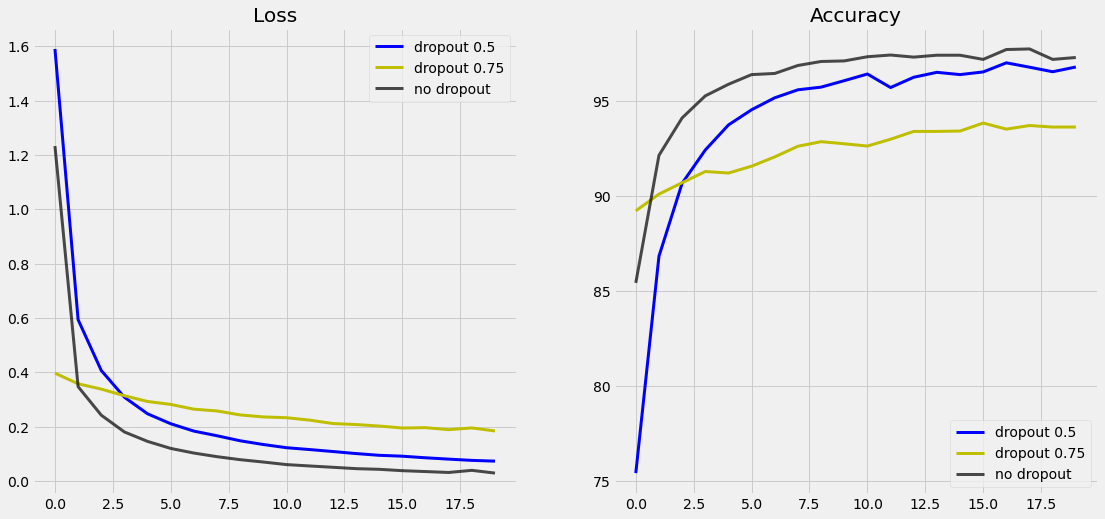

In [52]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (17,8))

ax[0].set_title('Loss')
ax[0].plot(drop05loss, label = 'dropout 0.5', linewidth = 3, c = 'b')
ax[0].plot(drop075loss, label = 'dropout 0.75', linewidth = 3, c = 'y')
ax[0].plot(nodroploss, label = 'no dropout', linewidth = 3, c = 'black', alpha = 0.7)
ax[0].legend()
ax[0].grid(True)

ax[1].set_title('Accuracy')
ax[1].plot(drop05acc, label = 'dropout 0.5', linewidth = 3, c = 'b')
ax[1].plot(drop075acc, label = 'dropout 0.75', linewidth = 3, c = 'y')
ax[1].plot(nodropacc, label = 'no dropout', linewidth = 3, c = 'black', alpha = 0.7)
ax[1].legend()
ax[1].grid(True)